### Improting Libries

In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings

# Load titanic data

In [5]:
df = sns.load_dataset('titanic')

In [6]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

# Number of Rows and Column

In [7]:
df.shape

(891, 15)

# Name of the column

In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# Information about data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# unique values for sex(gender) column

In [10]:
result = df['sex'].unique()

In [11]:
result

array(['male', 'female'], dtype=object)

# describe data

In [12]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

# Creating bar plot by gender

In [13]:
warnings.filterwarnings('ignore')

<Axes: xlabel='sex', ylabel='age'>

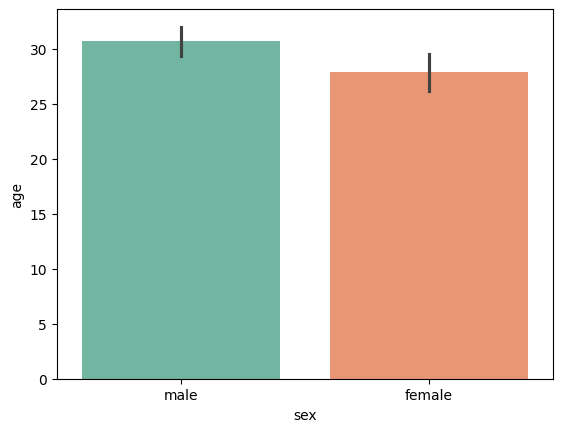

In [14]:
sns.barplot(x = 'sex', y = 'age', data = df ,palette="Set2")

# Get a count of the number of survivors

In [15]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

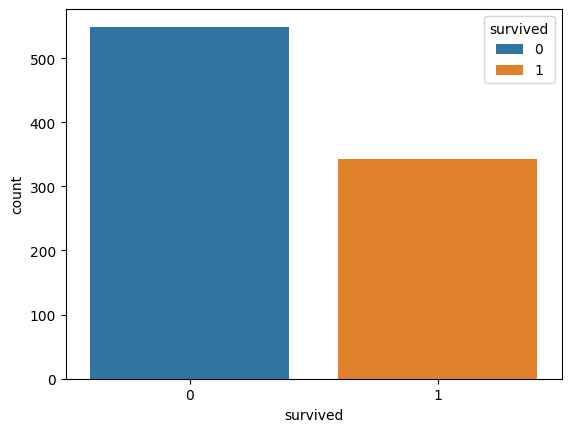

In [16]:
sns.countplot(x = "survived", data = df ,hue = "survived")

# Plot the survival rate of each class

In [17]:
df.pivot_table('survived', index = 'sex', columns = 'class')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [18]:
sns.barplot(x = 'class', y = 'survived', data = df)

<Axes: xlabel='class', ylabel='survived'>

# Plot the survival rate by gender,age and class

In [19]:
diff_ages = pd.cut(df['age'], [0, 18, 80])

In [20]:
df.pivot_table('survived', ['sex', diff_ages], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

# Finding the most of the tickets, using dist plot

<Axes: xlabel='fare'>

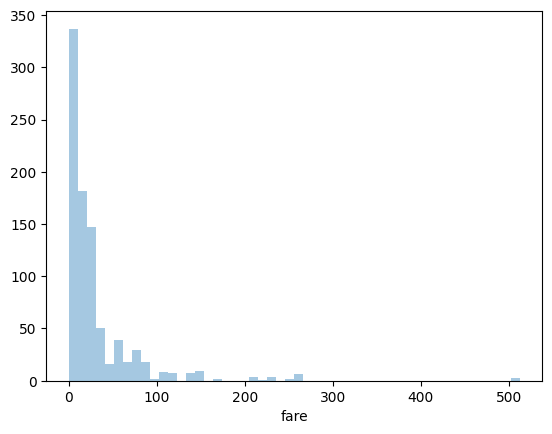

In [21]:
sns.distplot(df['fare'],kde = False)

# Creating a boxplot with sex column(gender) survived

<Axes: xlabel='sex', ylabel='age'>

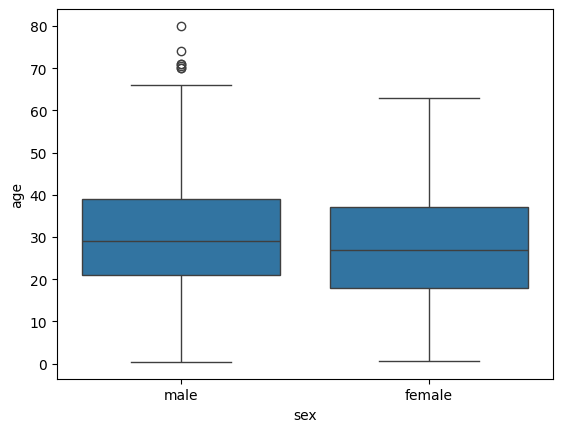

In [22]:
sns.boxplot(x = 'sex', y = 'age', data = df)

# Creating boxplot with survived

<Axes: xlabel='sex', ylabel='age'>

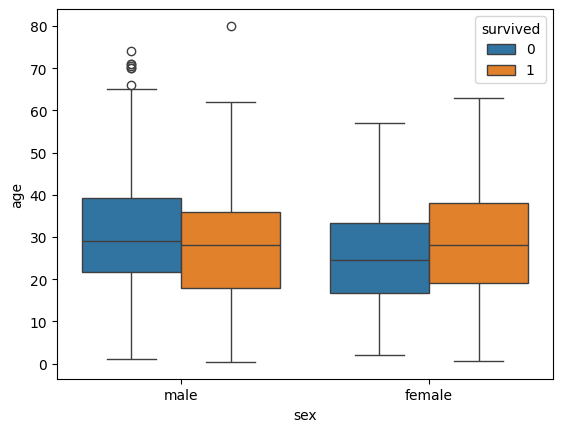

In [23]:
sns.boxplot(x ='sex',y = 'age',data = df , hue ="survived")

# Creating violin plot

<Axes: xlabel='sex', ylabel='age'>

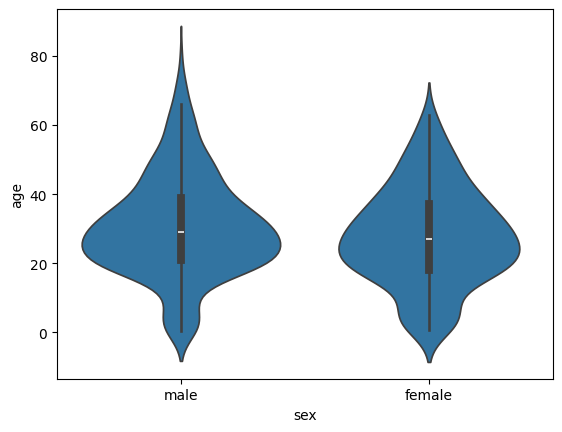

In [24]:
sns.violinplot(x = 'sex', y = 'age', data = df)

# Creating violin plot with survived 

<Axes: xlabel='sex', ylabel='age'>

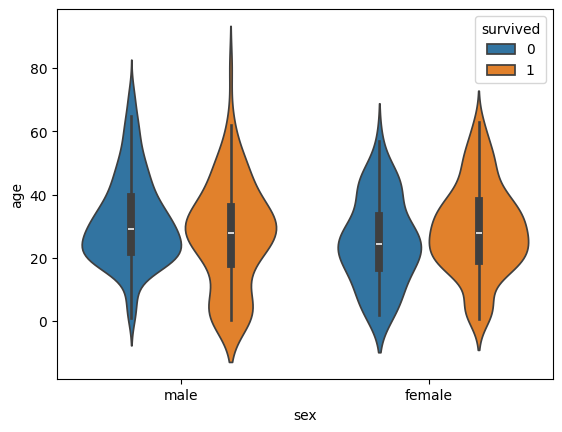

In [25]:
sns.violinplot(x = 'sex', y = 'age', data = df , hue = "survived")

In [26]:
sns.jointplot(x='fare',y='age',data=df)

# Distribution Plot

<Axes: xlabel='fare'>

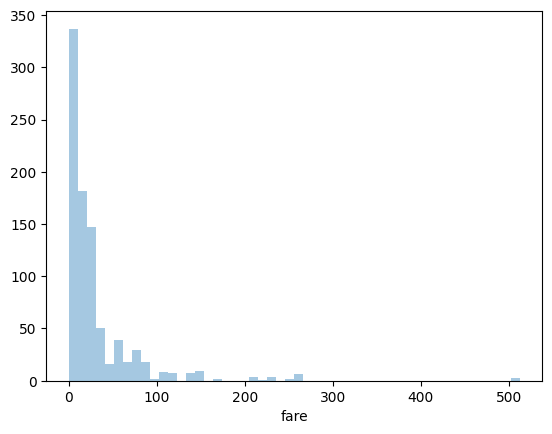

In [27]:
sns.distplot(df["fare"],kde=False)

In [28]:
sns.boxplot(x='pclass',y='age',data=df)

<Axes: xlabel='pclass', ylabel='age'>

# Swarm plot

<Axes: xlabel='pclass', ylabel='age'>

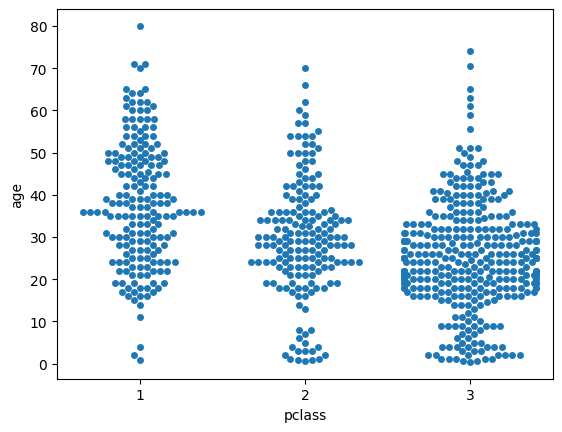

In [29]:
sns.swarmplot(x='pclass',y='age',data=df )

# Facet Grid

In [30]:
g = sns.FacetGrid(data=df, col='sex')
g.map(sns.distplot, 'age',kde=False)

# Heat map

In [31]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

<Axes: xlabel='survived', ylabel='pclass'>

#  Bar Plot for Fare (Continuous Feature) 

<Axes: xlabel='Fare_Range', ylabel='survived'>

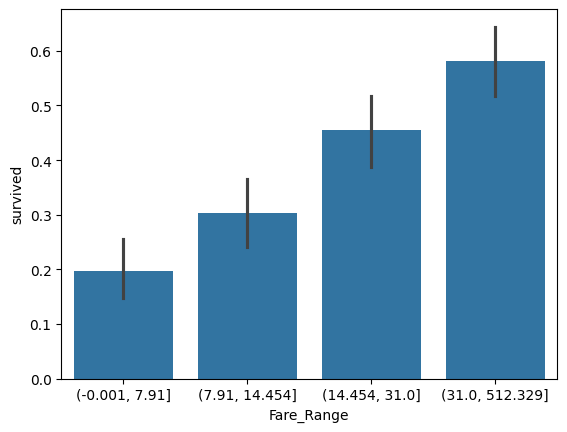

In [32]:
# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['fare'], 4)
 
# Barplot - Shows approximate values based 
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='survived', data = df)

# Categorical Count Plots for Embarked Feature 

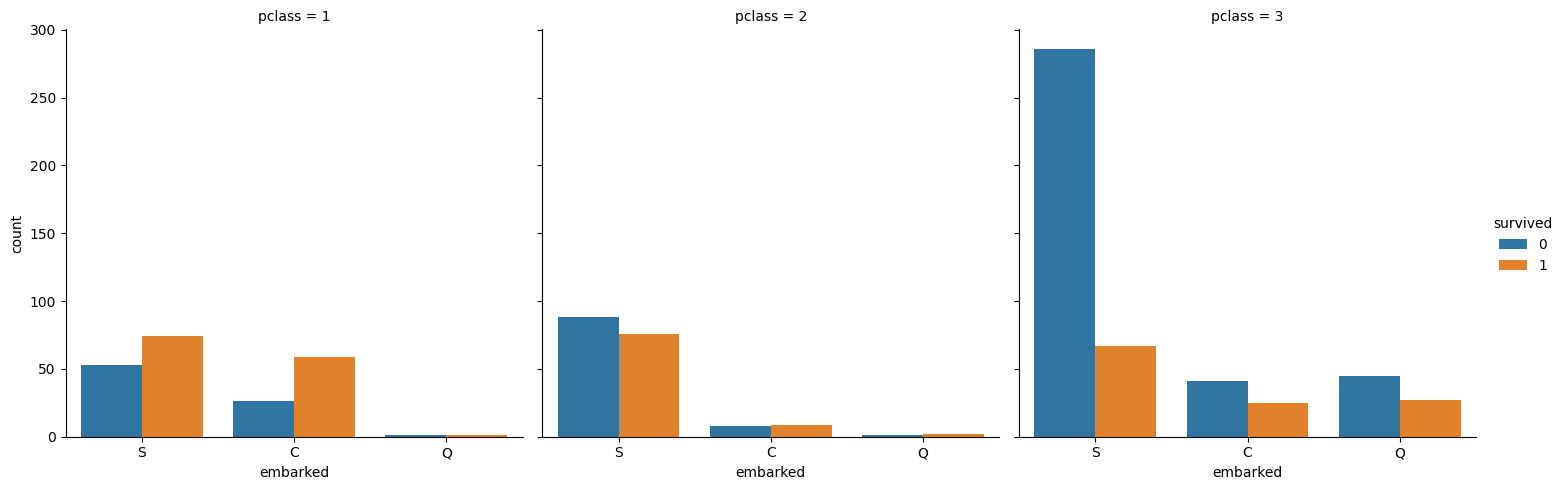

In [33]:
# Countplot
sns.catplot(x ='embarked', hue ='survived', kind ='count', col ='pclass', data = df)

In [34]:
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")


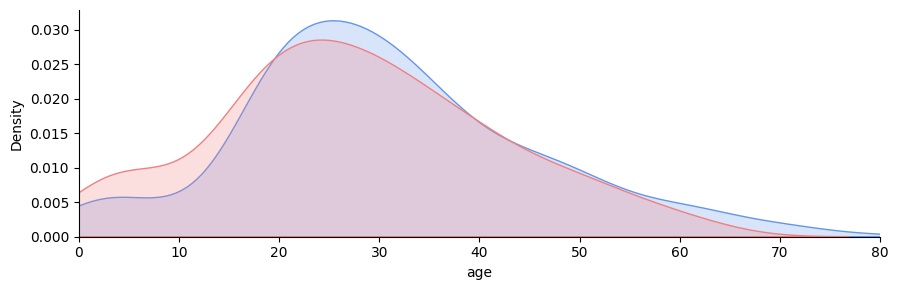

In [35]:
fg = sns.FacetGrid(df, hue="sex", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

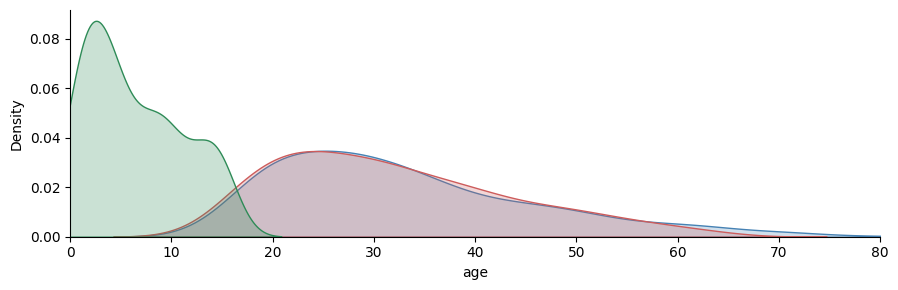

In [36]:
fg = sns.FacetGrid(df, hue="who", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

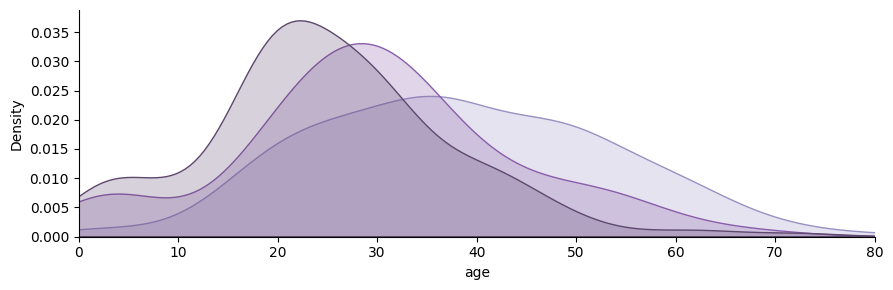

In [37]:
fg = sns.FacetGrid(df, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

### Finally let's look at the breakdown by age and sex.

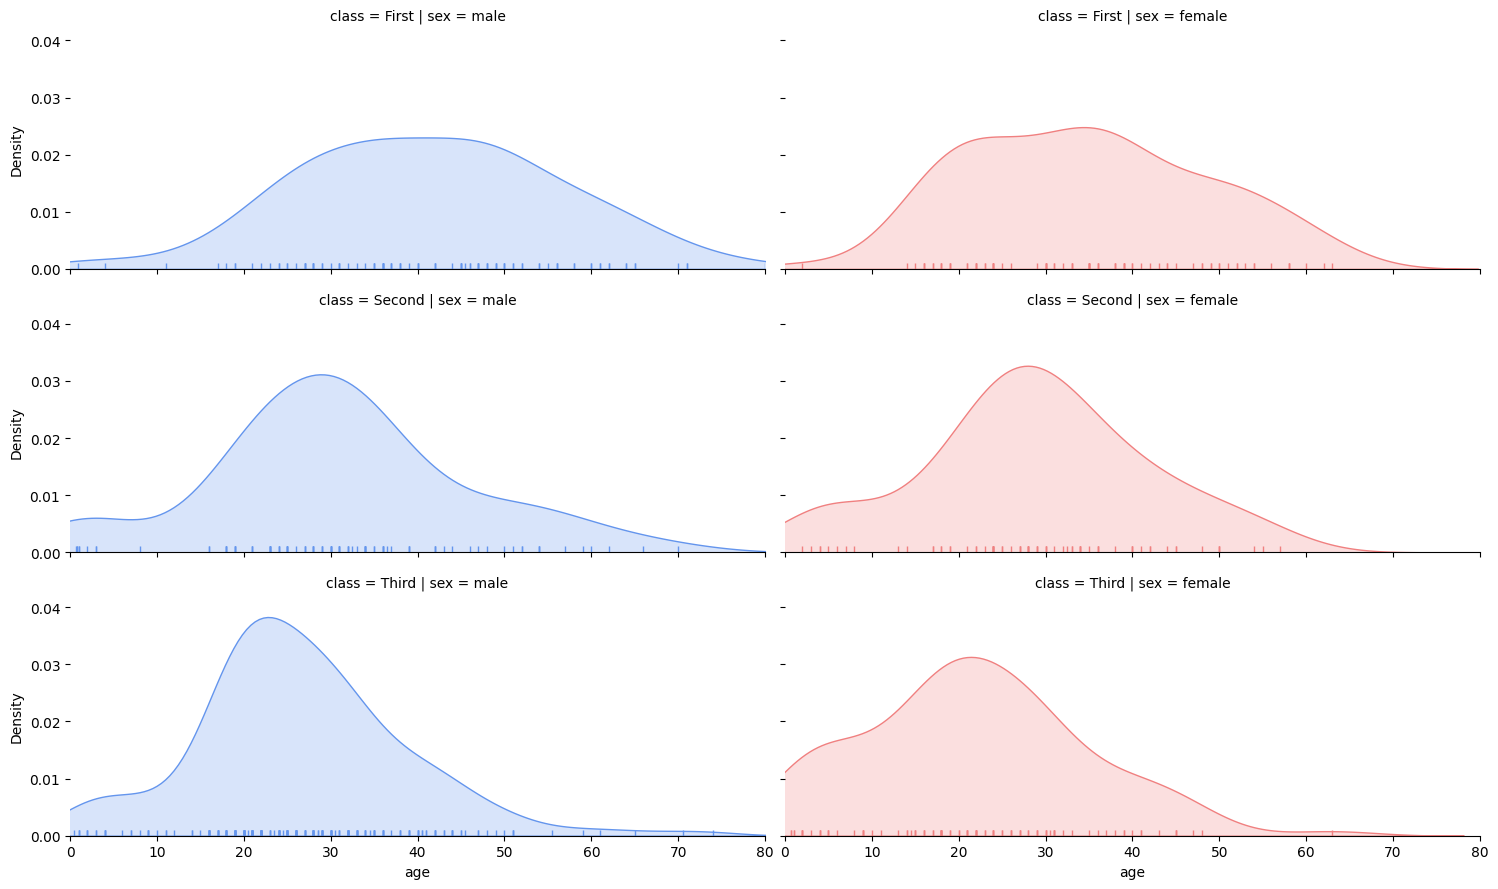

In [38]:
fg = sns.FacetGrid(df, col="sex", row="class", hue="sex", aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0, 80));

## What was the distribution of Ages for passengers in different classes that survived or not separated by gender?

In [39]:
#we can add a condition just by setting the hue parameter
grid = sns.FacetGrid(df, col='survived', row='pclass', hue='sex', height=3)
grid.map(sns.kdeplot, 'age', shade=True)
grid.add_legend()
#grid = grid.map(sns.kdeplot, 'Age', shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

# Pair Plot


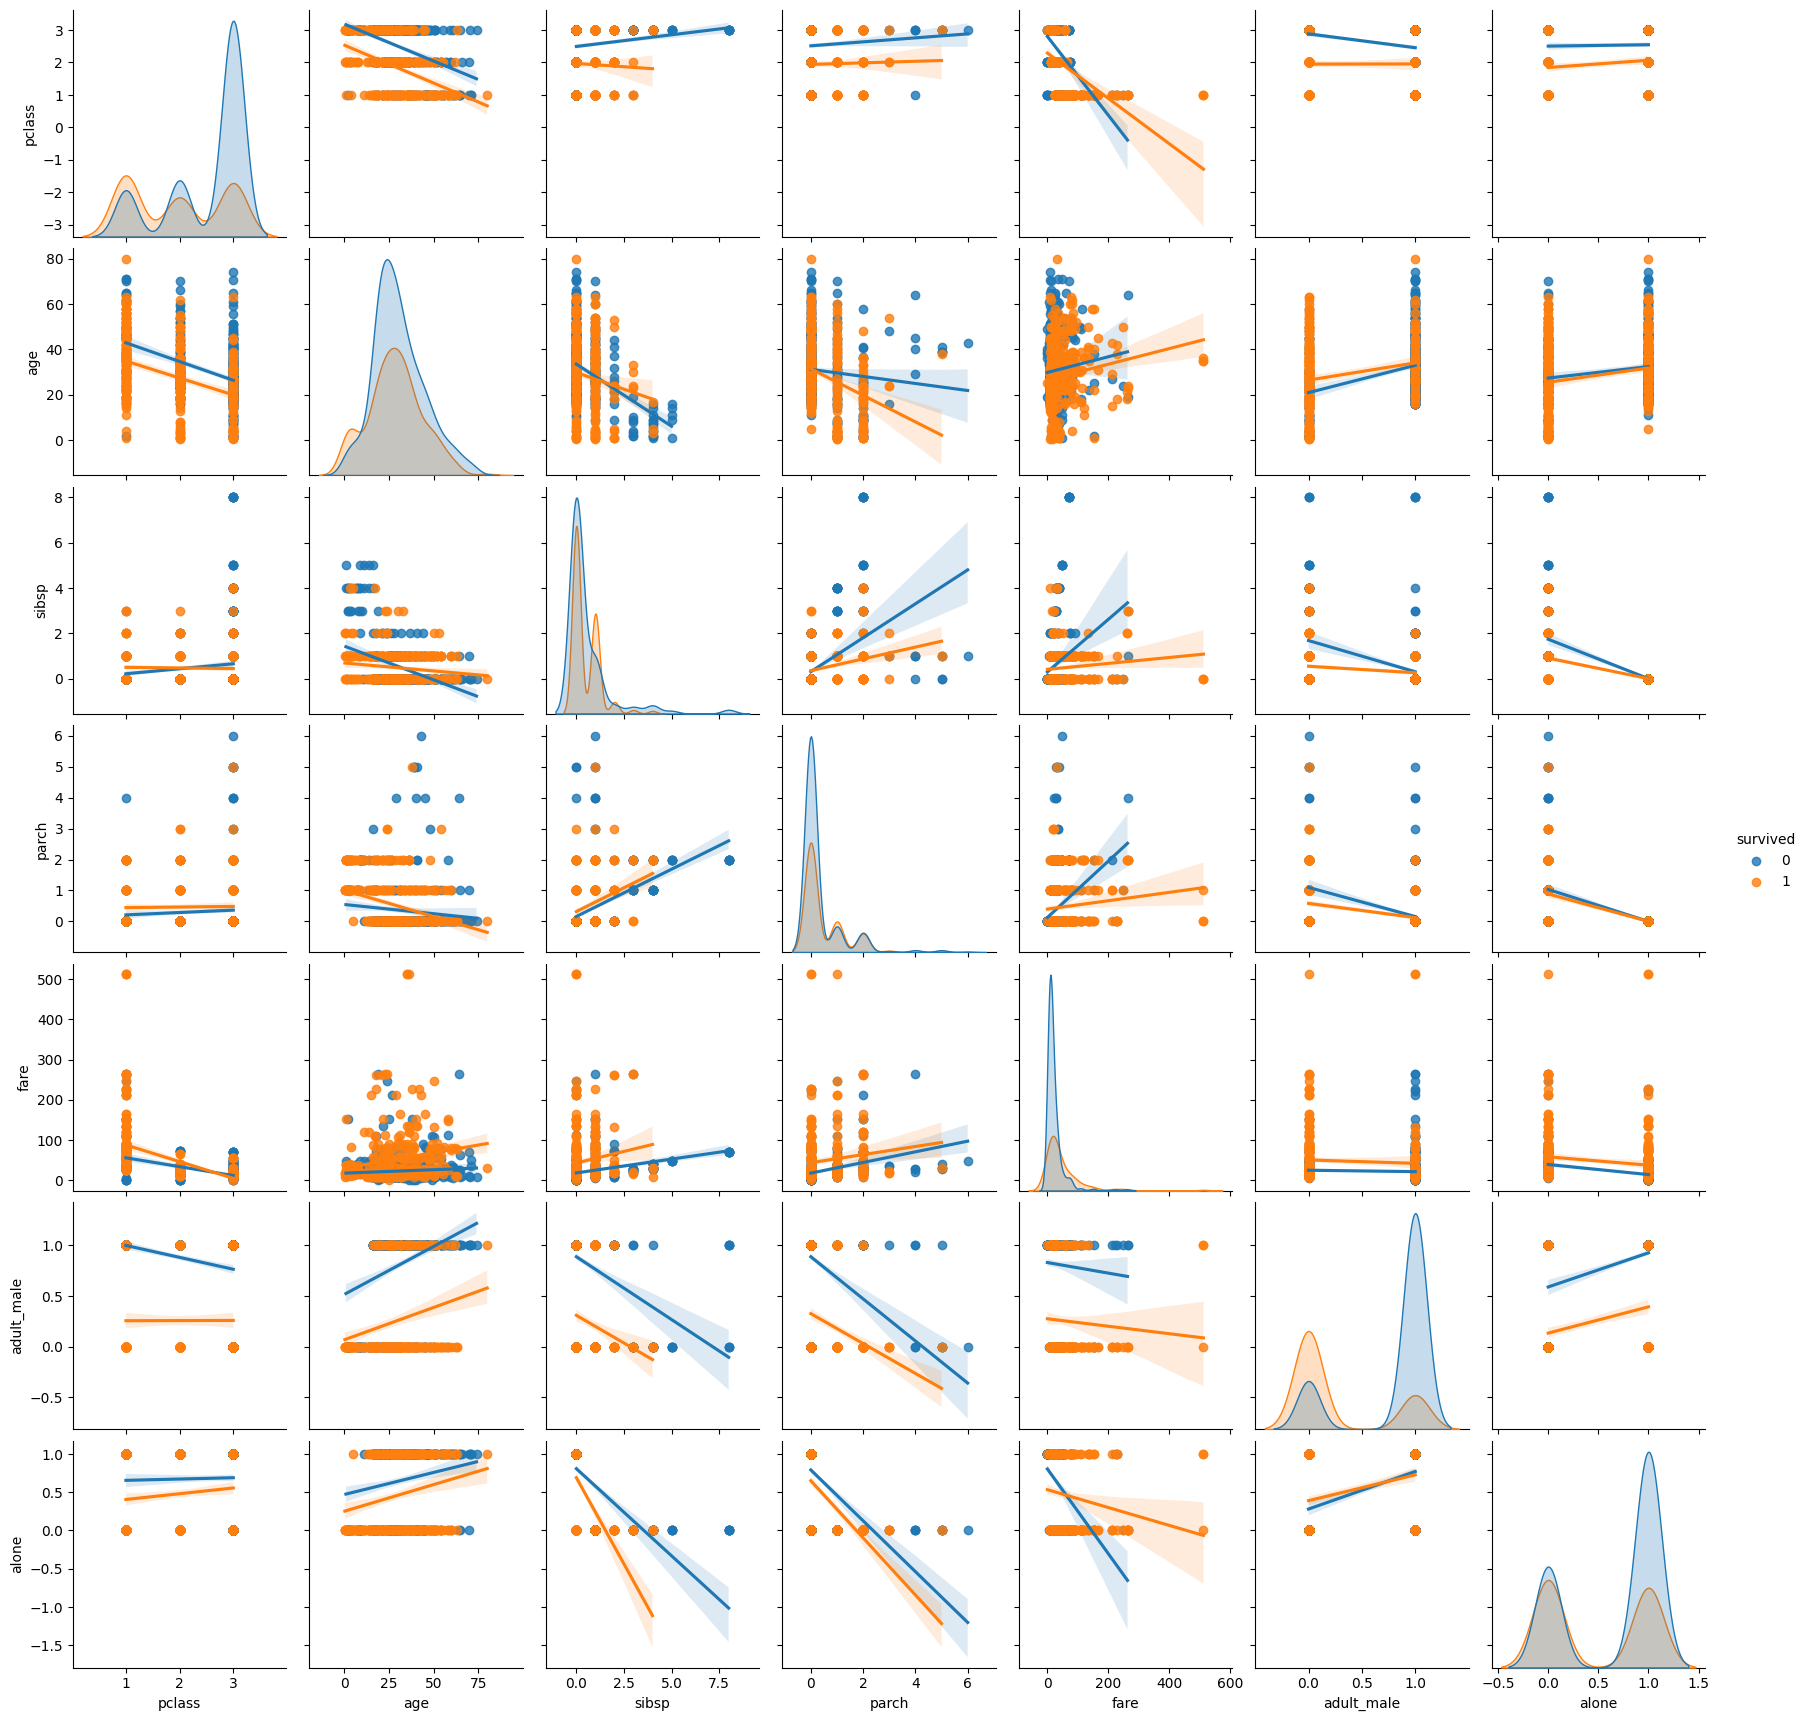

In [40]:
sns.pairplot(df,kind='reg',hue='survived')
plt.show()

In [41]:
import numpy as np

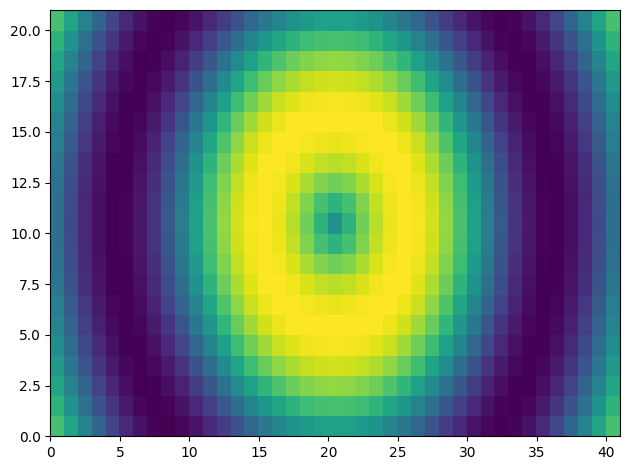

In [42]:
#visualizing mesh grids 
u = np.linspace(-2, 2, 41)
v = np.linspace(-1,1,21)

X,Y = np.meshgrid(u,v)

Z = np.sin(3*np.sqrt(X**2 + Y**2)) 
plt.pcolor(Z)
plt.xlim([0,41])
plt.ylim([0,21])
plt.tight_layout()
plt.show()